# Modelo estatístico de previsão de chuva

**Grupo:**
> Breno Marti

> Diogo Cintra

> João Pedro Chacon Ruiz

> Luis Felipe

In [1]:
#Importando as bibliotecas
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os
from numpy import arange
from numpy import percentile
import numpy as np
from pandas import DataFrame
from scipy.stats import probplot

In [2]:
def Grafico2Eixos(listax, labelx,  listay1, labely1, listay2, labely2):
    # Vamos agora plotar os resultados como foi pedido: dois eixos
    # Definicao dos objetos figura e eixo       
    fig, ax1 = plt.subplots()
    fig.set_size_inches(10, 5) 
    # plota a lista 1
    ax1.plot(listax, listay1, 'b')
    # dá nome ao eixo x
    ax1.set_xlabel(labelx)
    # dá nome ao eixo y1
    ax1.set_ylabel(labely1, color='b')
    # seta os limites dos eixos x e y
    # faz a cor das marcas no eixo y1 iguais a linha
    for tl in ax1.get_yticklabels():
        tl.set_color('b')    
    # Cria um eixo com valor de y independente, mas com o mesmo x
    ax2 = ax1.twinx()
    # plota a lista 2
    ax2.plot(listax, listay2, 'g')
    # dá nome ao eixo y2
    ax2.set_ylabel(labely2, color='g')
    # seta os limites dos eixos x e y
    #ax2.axis([0,2, 0, max(S)+.5])
    # faz a cor das marcas no eixo iguais a linha
    for tl in ax2.get_yticklabels():
        tl.set_color('g')
    plt.grid(True)
    plt.show()   

In [28]:
dados1 = pd.read_excel('previsao_chuva.xlsx')
dados1.head()

,codigo_estacao,data,hora,temp_inst,temp_max,temp_min,umid_inst,umid_max,umid_min,pto_orvalho_inst,pto_orvalho_max,pto_orvalho_min,pressao,pressao_max,pressao_min,vento_direcao,vento_vel,vento_rajada,radiacao,precipitacao
0,A401,2018-11-06,8,24.6,25.0,24.6,78,78.0,76.0,20.6,20.6,20.4,1006.7,1006.7,1006.2,0.8,64.0,5.2,NaN,0.0
1,A401,2018-11-06,16,29.9,31.1,29.8,56,62.0,55.0,20.2,22.1,20.2,1006.9,1007.6,1006.9,1.8,157.0,6.2,3389.0,0.0
2,A401,2018-11-06,4,24.7,25.2,24.7,77,80.0,75.0,20.4,21.3,20.2,1006.7,1007.1,1006.7,0.9,58.0,5.2,NaN,0.0
3,A401,2018-11-06,11,27.3,27.6,26.7,66,72.0,65.0,20.5,21.3,20.3,1008.9,1008.9,1008.1,1.9,65.0,5.7,1375.0,0.0
4,A401,2018-11-06,2,25.1,25.4,25.0,78,78.0,76.0,21.0,21.1,20.8,1007.6,1008.1,1007.6,1.2,90.0,5.0,NaN,0.0


In [4]:
datas = dados1.data
horas = dados1.hora

In [5]:
concat = []
for e in range(len(datas)):
    #concat.append(datas[e] + ',' + horas[e])
    d = datas[e]
    d = d.replace(hour=horas[e], minute=0, second=0)
    concat.append(d)
    
#print(concat)
dia_hora = pd.DataFrame(concat)

In [6]:
dados1.insert(0,'time', dia_hora, True)

In [7]:
dados_2 = dados1.drop(['data', 'hora'], axis=1)
dados_3 = dados_2.set_index("time")

dados2 = dados1.drop(['data', 'hora'], axis=1)
dados2.head()

,time,codigo_estacao,temp_inst,temp_max,temp_min,umid_inst,umid_max,umid_min,pto_orvalho_inst,pto_orvalho_max,pto_orvalho_min,pressao,pressao_max,pressao_min,vento_direcao,vento_vel,vento_rajada,radiacao,precipitacao
0,2018-11-06 08:00:00,A401,24.6,25.0,24.6,78,78.0,76.0,20.6,20.6,20.4,1006.7,1006.7,1006.2,0.8,64.0,5.2,NaN,0.0
1,2018-11-06 16:00:00,A401,29.9,31.1,29.8,56,62.0,55.0,20.2,22.1,20.2,1006.9,1007.6,1006.9,1.8,157.0,6.2,3389.0,0.0
2,2018-11-06 04:00:00,A401,24.7,25.2,24.7,77,80.0,75.0,20.4,21.3,20.2,1006.7,1007.1,1006.7,0.9,58.0,5.2,NaN,0.0
3,2018-11-06 11:00:00,A401,27.3,27.6,26.7,66,72.0,65.0,20.5,21.3,20.3,1008.9,1008.9,1008.1,1.9,65.0,5.7,1375.0,0.0
4,2018-11-06 02:00:00,A401,25.1,25.4,25.0,78,78.0,76.0,21.0,21.1,20.8,1007.6,1008.1,1007.6,1.2,90.0,5.0,NaN,0.0


___
#### Definindo as variáveis que vamos estudar 

In [8]:
dados_log = np.log(dados_3[['temp_inst','pressao','umid_inst','precipitacao']])

dados3 = dados2.transpose()
dados4 = dados3.loc[['time','temp_inst', 'pressao','umid_inst', 'precipitacao']]
dados5 = dados4.transpose()
dados5.head()

,time,temp_inst,pressao,umid_inst,precipitacao
0,2018-11-06 08:00:00,24.6,1006.7,78,0
1,2018-11-06 16:00:00,29.9,1006.9,56,0
2,2018-11-06 04:00:00,24.7,1006.7,77,0
3,2018-11-06 11:00:00,27.3,1008.9,66,0
4,2018-11-06 02:00:00,25.1,1007.6,78,0


___
## Analisando os dias que tiveram chuvas

##### Análise com log

In [9]:
dados_log_com_chuva = dados_log[dados_log['precipitacao']>0]
dados_log_com_chuva.head()

,temp_inst,pressao,umid_inst,precipitacao
time,,,,
2018-11-07 01:00:00,3.161247,6.916418,4.477337,1.098612
2018-11-08 02:00:00,3.131137,6.916517,4.488636,1.526056
2018-11-08 03:00:00,3.144152,6.915723,4.510860,0.693147
2018-11-08 08:00:00,3.144152,6.914532,4.532599,2.079442
2018-11-08 10:00:00,3.173878,6.915525,4.532599,1.609438


In [10]:
temperatura1_log = dados_log_com_chuva['temp_inst']
pressao1_log = dados_log_com_chuva['pressao']
umidade1_log = dados_log_com_chuva['umid_inst']
precipitacao1_log = dados_log_com_chuva['precipitacao']

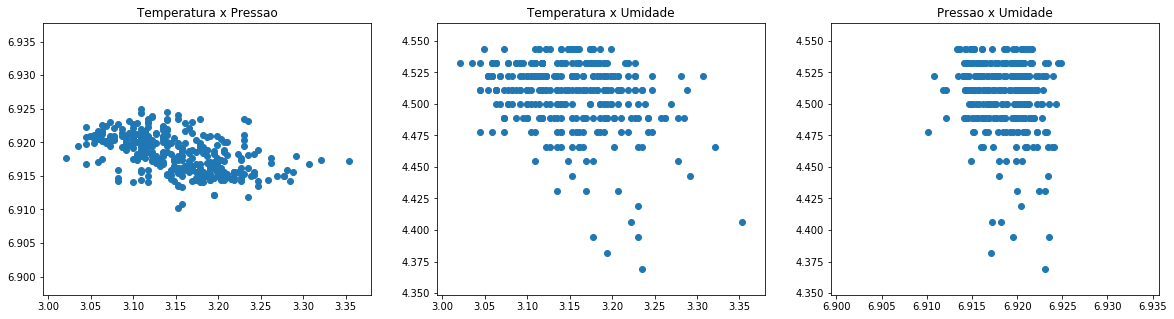

In [11]:
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(20, 5) 
axs[0].scatter(temperatura1_log,pressao1_log);
axs[0].set_title('Temperatura x Pressao');
axs[1].scatter(temperatura1_log,umidade1_log);
axs[1].set_title('Temperatura x Umidade');
axs[2].scatter(pressao1_log,umidade1_log);
axs[2].set_title('Pressao x Umidade');

##### Análise sem log

In [12]:
dados_com_chuva = dados5[dados5['precipitacao']>0]
dados_com_chuva.head()

,time,temp_inst,pressao,umid_inst,precipitacao
31,2018-11-07 02:00:00,23.8,1008.6,90,0.2
34,2018-11-07 10:00:00,27.4,1008.2,69,0.2
46,2018-11-07 01:00:00,23.6,1008.7,88,3
51,2018-11-08 02:00:00,22.9,1008.8,89,4.6
60,2018-11-08 01:00:00,24.1,1009.1,85,0.2


In [13]:
tempo1 = dados_com_chuva['time']
temperatura1 = dados_com_chuva['temp_inst']
pressao1 = dados_com_chuva['pressao']
umidade1 = dados_com_chuva['umid_inst']
precipitacao1 = dados_com_chuva['precipitacao']

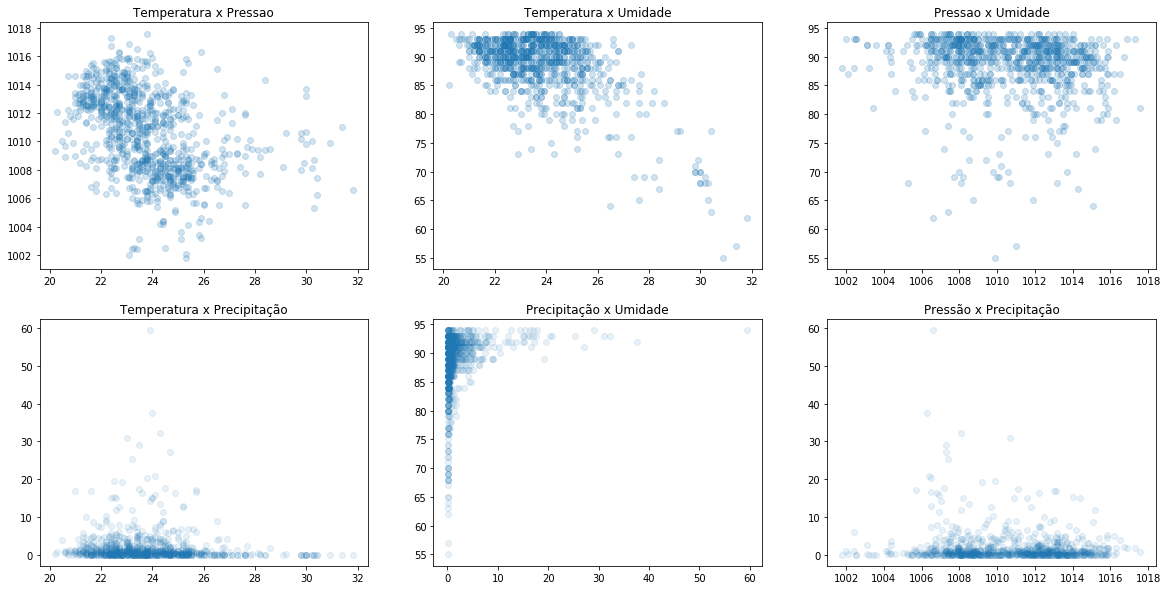

In [35]:
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(20, 10) 
axs[0,0].scatter(temperatura1,pressao1, alpha=0.2);
axs[0,0].set_title('Temperatura x Pressao');
axs[0,1].scatter(temperatura1,umidade1, alpha=0.2);
axs[0,1].set_title('Temperatura x Umidade');
axs[0,2].scatter(pressao1,umidade1, alpha=0.2);
axs[0,2].set_title('Pressao x Umidade');
axs[1,0].scatter(temperatura1,precipitacao1, alpha=0.1);
axs[1,0].set_title('Temperatura x Precipitação');
axs[1,1].scatter(precipitacao1,umidade1, alpha=0.1);
axs[1,1].set_title('Precipitação x Umidade');
axs[1,2].scatter(pressao1,precipitacao1, alpha=0.1);
axs[1,2].set_title('Pressão x Precipitação');

***Valores de correlação entre as variáveis***

In [36]:
temperatura1 = temperatura1.astype(float)
umidade1 = umidade1.astype(float)
pressao1 = pressao1.astype(float)
precipitacao1 = precipitacao1.astype(float)
print('Correlação entre temperatura e pressão:', temperatura1.corr(pressao1))
print('Correlação entre temperatura e umidade:', temperatura1.corr(umidade1))
print('Correlação entre pressão e umidade:',pressao1.corr(umidade1))
print('Correlação entre precipitação e pressão:', precipitacao1.corr(pressao1))
print('Correlação entre precipitação e umidade:', precipitacao1.corr(umidade1))
print('Correlação entre precipitação e temperatura:',precipitacao1.corr(temperatura1))

Correlação entre temperatura e pressão: -0.4076880756078036
Correlação entre temperatura e umidade: -0.5950262535123811
Correlação entre pressão e umidade: -0.10983952939618111
Correlação entre precipitação e pressão: -0.10332726641360411
Correlação entre precipitação e umidade: 0.23999078814155775
Correlação entre precipitação e temperatura: -0.06301063775797605


/Users/joaopedrochacon/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


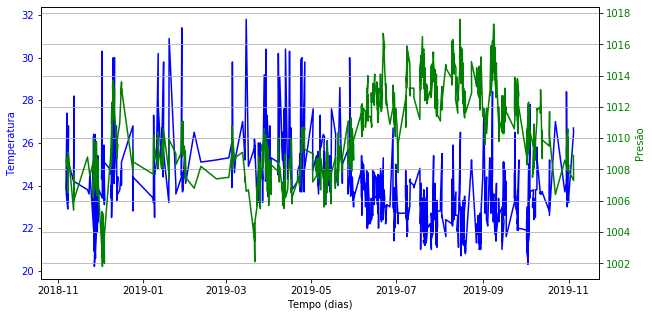

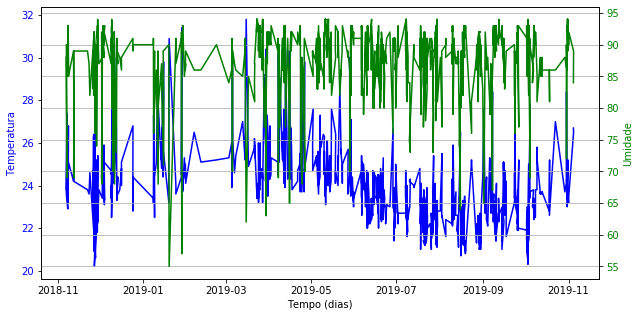

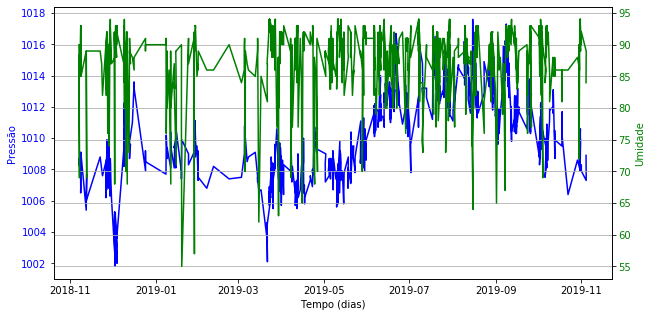

In [16]:
Grafico2Eixos(tempo1, 'Tempo (dias)', temperatura1,'Temperatura', pressao1, 'Presão')
Grafico2Eixos(tempo1, 'Tempo (dias)', temperatura1,'Temperatura', umidade1, 'Umidade')
Grafico2Eixos(tempo1, 'Tempo (dias)', pressao1,'Pressão', umidade1, 'Umidade')

___
## Analisando os dias que não tiveram chuvas

##### Análise com log

In [17]:
dados_log_sem_chuva = dados_log[dados_log['precipitacao']==0]
dados_log_sem_chuva.head()

,temp_inst,pressao,umid_inst,precipitacao
time,,,,
2018-11-22 05:00:00,3.169686,6.916517,4.488636,0.0
2018-11-26 22:00:00,3.072693,6.916418,4.521789,0.0
2018-11-26 23:00:00,3.077312,6.916616,4.521789,0.0
2018-11-27 22:00:00,3.025291,6.916616,4.488636,0.0
2018-12-02 08:00:00,3.190476,6.911946,4.521789,0.0


In [18]:
temperatura2_log = dados_log_com_chuva['temp_inst']
pressao2_log = dados_log_com_chuva['pressao']
umidade2_log = dados_log_com_chuva['umid_inst']
precipitacao2_log = dados_log_com_chuva['precipitacao']

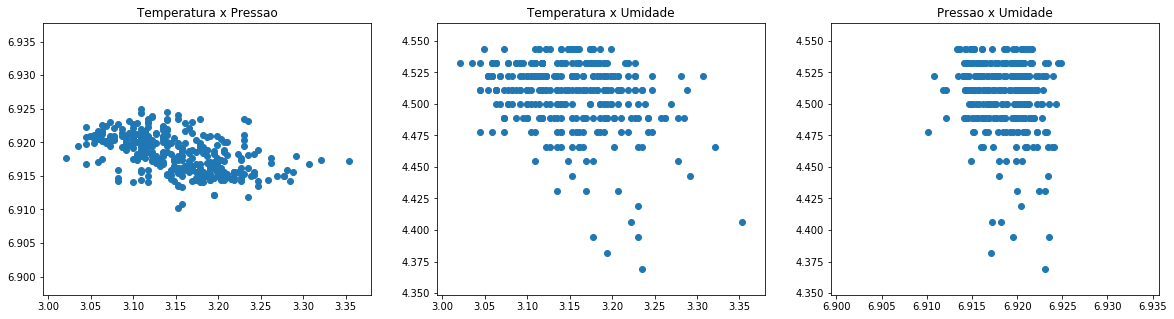

In [19]:
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(20, 5) 
axs[0].scatter(temperatura2_log,pressao2_log);
axs[0].set_title('Temperatura x Pressao');
axs[1].scatter(temperatura2_log,umidade2_log);
axs[1].set_title('Temperatura x Umidade');
axs[2].scatter(pressao2_log,umidade2_log);
axs[2].set_title('Pressao x Umidade');

##### Análise sem log

In [20]:
dados_sem_chuva = dados5[dados5['precipitacao']==0]
dados_sem_chuva.head()

,time,temp_inst,pressao,umid_inst,precipitacao
0,2018-11-06 08:00:00,24.6,1006.7,78,0
1,2018-11-06 16:00:00,29.9,1006.9,56,0
2,2018-11-06 04:00:00,24.7,1006.7,77,0
3,2018-11-06 11:00:00,27.3,1008.9,66,0
4,2018-11-06 02:00:00,25.1,1007.6,78,0


In [21]:
tempo2 = dados_sem_chuva['time']
temperatura2 = dados_sem_chuva['temp_inst']
pressao2 = dados_sem_chuva['pressao']
umidade2 = dados_sem_chuva['umid_inst']
precipitacao2 = dados_sem_chuva['precipitacao']

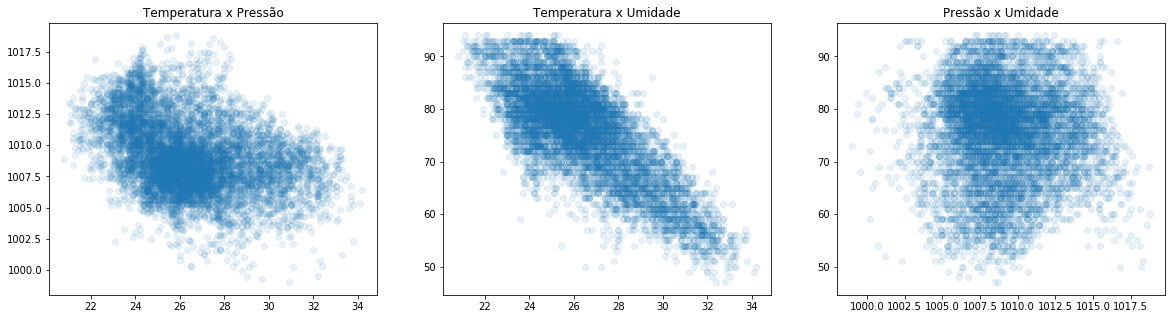

In [32]:
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(20, 5) 
axs[0].scatter(temperatura2,pressao2, alpha=0.1);
axs[0].set_title('Temperatura x Pressão');
axs[1].scatter(temperatura2,umidade2, alpha=0.1);
axs[1].set_title('Temperatura x Umidade');
axs[2].scatter(pressao2,umidade2, alpha=0.1);
axs[2].set_title('Pressão x Umidade');

***Valores de correlação entre as variáveis***

In [23]:
temperatura2 = temperatura2.astype(float)
umidade2 = umidade2.astype(float)
pressao2 = pressao2.astype(float)
print('Correlação entre temperatura e pressão:', temperatura2.corr(pressao2))
print('Correlação entre temperatura e umidade:', temperatura2.corr(umidade2))
print('Correlação entre pressão e umidade:',pressao2.corr(umidade2))

Correlação entre temperatura e pressão: -0.37013423515633465
Correlação entre temperatura e umidade: -0.7607690347330318
Correlação entre pressão e umidade: -0.0234013734262953


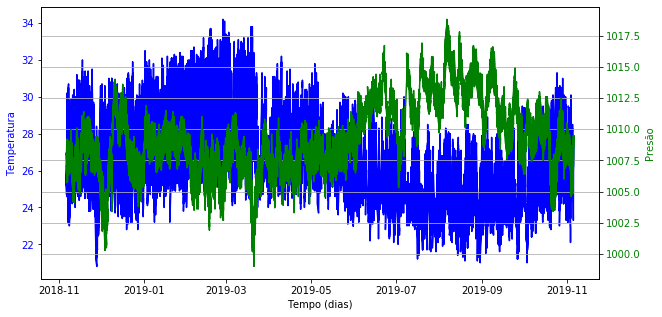

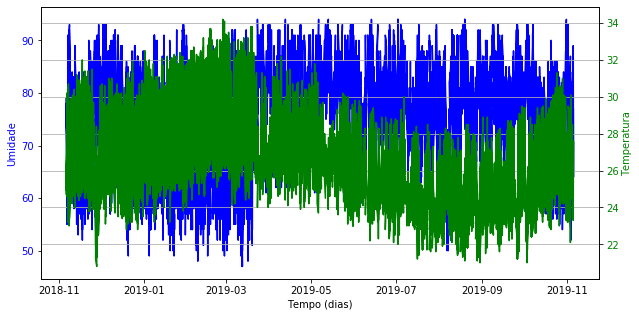

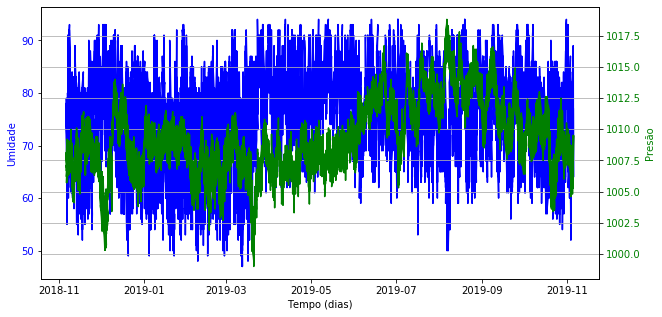

In [24]:
Grafico2Eixos(tempo2, 'Tempo (dias)', temperatura2,'Temperatura', pressao2, 'Presão')
Grafico2Eixos(tempo2, 'Tempo (dias)', umidade2, 'Umidade', temperatura2,'Temperatura')
Grafico2Eixos(tempo2, 'Tempo (dias)',umidade2, 'Umidade',pressao2, 'Presão')